## Линейные модели
Пензин М.С.

penzin.ml.tsu@gmail.com

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

## Регрессия

В общем случае, при решении задачи регрессии, на необходимо найти функцию $f(\vec{x})$, которая по набору признаков $\vec{x}$ дает оценку исхода $y$. 

Давайте рассмотрим самый простой вариант такой функции:

$$
    \begin{align}
    f(\vec{x})
    &= \omega_0 x_0 + \omega_1 x_1 + \dotsc + \omega_k x_K \\
    &= \sum_{k = 0}^{K} \omega_k x_k \\
    &= \vec{x}^T \vec{\omega} 
    \end{align}
$$

Здесь $x_0$ всегда равен 1, $\vec{\omega}$ - вектор параметров модели(веса)

Добавим случайную ошибку $\varepsilon$

$$
    y_i = \vec{x}^T \vec{\omega} + \varepsilon_i
$$

такую, что 
1. $\forall i, E[\varepsilon_i] = 0$
2. $\forall i, D[\varepsilon_i] = \sigma < \infty$
3. $\forall i \ne j, \mathrm{Cov}(\varepsilon_i, \varepsilon_j) = E[\varepsilon_i \varepsilon_j] - E[\varepsilon_i] E[\varepsilon_j] = 0$

$$
    \vec{y} = X \vec{\omega} + \vec{\varepsilon}
$$

Здесь 
$$
    \vec{y} = [y_1, y_2, \dotsc, y_N]^T \\
    X = [\vec{x_1}, \vec{x_2}, \dotsc, \vec{x_N}]^T \\
    \vec{x} = [1, x_1, \dotsc, x_K]^T \\    
    \vec{\omega} = [\omega_0, \omega_1, \dotsc, \omega_K]^T \\       \vec{\varepsilon} = [\varepsilon_0, \varepsilon_1, \dotsc, \varepsilon_K]^T
$$

Как оценить значения весов $\vec{\omega}$?

## Метод наименьших квадратов

$$
\begin{align}
L(\vec{\omega}) 
&= \sum_{i=1}^{N} \left(
    y_i - \vec{x}^T_i \vec{\omega} 
\right)^2 \\
&= (\vec{y} - X\vec{\omega})^T (\vec{y} - X\vec{\omega}) \\
&= ||\vec{y} - X\vec{\omega}||^2_2
\end{align} 
$$

Согласно теореме [Гаусса-Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0), оценка по данному методу является лучшей оценкой параметров модели среди всех линейных и несмещенных оценок, то есть обладает наименьшей дисперсией.

Несмещенность
$$
    E[\vec{\omega}^*] = \vec{\omega}^{real}
$$

Если для простоты предположить, что $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, то

$$
P(y_i | \vec{x}, \vec{\omega}) = \vec{x}^T\vec{\omega} + \mathcal{N}(0, \sigma^2) = \mathcal{N}(\vec{x}^T\vec{\omega}, \sigma^2)
$$

так как ошибки не скоррелированы, мы можем записать записать полную плотность вероятности (правдоподобие)
$$
\begin{align}
\log P(\vec{y}| X, \vec{\omega}) 
&= \log \prod_{i=1}^{N} \mathcal{N}(\vec{x}^T_i\vec{\omega}, \sigma^2) \\
&= -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{N} (y_i - \vec{x}^T_i \vec{\omega})^2
\end{align}
$$

## Поиск решения

Для того, чтобы найти решение, нам нужно найти производные по параметрам $\vec{\omega}$

$$
\frac{\partial L}{\partial \vec{\omega}} = 
 -  2 X^T  \vec{y} + 2 X^T X\vec{\omega} = 0
$$

$$
    X^T X \vec{\omega} = X^T \vec{y}
$$

$$
    \vec{\omega} = (X^T X)^{-1} X^T \vec{y}
$$

## Полиномиальная регрессия

Мы можем ввести новые признаки в виде $\prod_i\vec{x}_i^{p_i}$.

Например, для одного признака
$$
    y = \omega_0 + \omega_1 x + \dotsc + \omega_p x^p + \varepsilon
$$

для двух признаков $(x_1, x_2)$ и для второго порядка - это даст $(1, x_1, x_2, x_1^2, x_2^2, x_1 x_2)$

## Пример

In [3]:
import numpy.linalg as NL

def plot(powers, seed=1):
    np.random.seed(seed)
    
    x = np.sort(np.random.uniform(-np.pi, np.pi, 30))
    y = np.sin(x) + 1    
    noise = np.random.normal(0, 0.15, y.shape)
    
    x = np.vstack([np.ones(x.shape), x])
    yn = np.atleast_2d(y + noise).T
    x_full = np.linspace(-np.pi, np.pi, 500)
    
    plt.ylim([-0.5, 2.5])
    plt.plot(x_full, np.sin(x_full) + 1, '--', label="y")
    plt.plot(x[1], yn, ".", label="y+noise")    
    
    for p in powers:
        poly = []
        for i in range(2, p + 1):
            poly.append(x[1] ** i)   
        X = np.vstack([x,] + poly).T
        w = NL.inv(X.T @ X) @ X.T @ yn
        mse = ((yn - X @ w)**2).sum() / y.shape[0]
        plt.plot(x_full, np.polyval(w[::-1], x_full), '-', label="poly_%d (%.3f)" % (p, mse))    
    plt.grid()
    plt.legend()
    plt.show() 

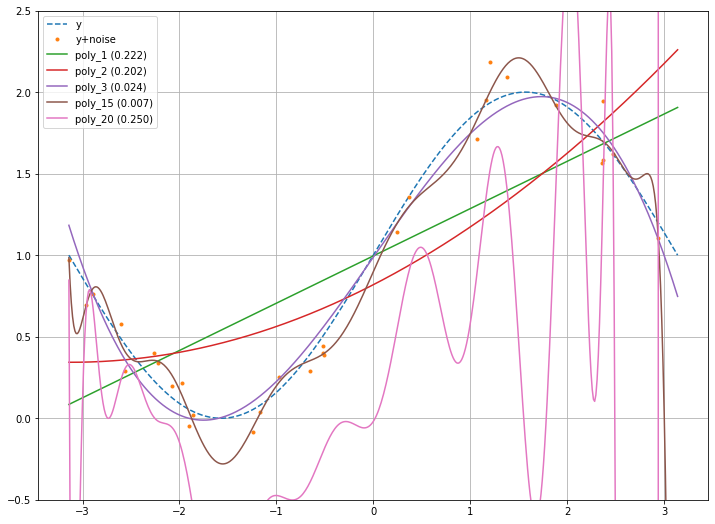

In [4]:
plot([1, 2, 3, 15, 20], seed=1)   

## Проблемы

Что будет, если ранг матрицы $X^T X$ будет меньше $N$?

Это соответствует тому, что какие-то признаки являются линейной комбинацией других признаков (мультиколлинеарность).

В нашем решением перестает существовать обратная матрица 

$$
    \vec{\omega} = (X^T X)^{-1} X^T \vec{y}
$$

Также вызывают проблемы случае, когда один из признаков приближенно линейно зависит от других признаков. В этом случае, обратная матрица может расчитаться некорректно (содержит очень большие/очень маленькие значения).

## Регуляризация

В случае, если обратная матрица $(X^T X)^{-1}$ не существует, это переводит нашу задачу в категорию некорректно поставленных.

Тихонов предложил ввести дополнительное внешнее условие - регуляризацию.

$$
L = ||\vec{y} - X \vec{\omega}||_2^2 + \lambda J(\vec{\omega})
$$

Самый простой случай - это $l_2$-регуляризация

$$
    J(\vec{\omega}) = ||\vec{\omega}||_2^2 =  \vec{\omega}^T \vec{\omega}
$$

Найдем производную 

$$
\frac{\partial J}{\partial \vec{\omega}} = 2 \vec{\omega}
$$

$$
\frac{\partial L}{\partial \vec{\omega}} = 
 -  2 X^T  \vec{y} + 2 (X^T X + \lambda I) \vec{\omega} = 0
$$

$$
    (X^T X + \lambda I) \vec{\omega} = X^T \vec{y}
$$

$$
    \vec{\omega} = (X^T X + \lambda I)^{-1} X^T \vec{y}
$$

Такая регрессия также называется гребневой (ridge regression).  Её основной минус в том, что оценки параметров начинают получатся смещенным к нулю.

In [5]:
import numpy.linalg as NL

def plot(powers, lamb=0.1, seed=1):
    np.random.seed(seed)
    
    result = {}
    x = np.sort(np.random.uniform(-np.pi, np.pi, 30))
    y = np.sin(x) + 1    
    noise = np.random.normal(0, 0.15, y.shape)
    
    x = np.vstack([x]).T
    yn = np.atleast_2d(y + noise).T
    x_full = np.linspace(-1.3*np.pi, 1.3*np.pi, 500)
    
    plt.ylim([-0.5, 2.5])
    plt.plot(x_full, np.sin(x_full) + 1, '--', label="y")
    plt.plot(x, yn, ".", label="y+noise")    
    
    for p in powers:
        poly = []
        for i in range(0, p + 1):
            poly.append(x.T ** i)   
        X = np.vstack(poly).T   

        mu = X.mean(axis=0); mu[0] = 0
        std = X.std(axis=0); std[0] = 1

        X_s = (X - mu) / std
        X_s[:,0] = 1
        
        I = np.identity(X_s.shape[1])
        w = NL.inv((1-lamb) * X_s.T @ X_s + lamb*I) @ X_s.T @ yn
        result[p] = w.ravel()
        mse = ((yn - X_s @ w)**2).sum() / y.shape[0]
        
        xf_poly = []
        for i in range(0, p + 1):
            xf_poly.append(x_full**i)
        xf_poly = np.vstack(xf_poly).T
        xf_poly = (xf_poly - mu) / std
        
        plt.plot(np.atleast_2d(x_full).T, xf_poly @ w, 
                 '-', label="poly_%d (%.3f)" % (p, mse))    
    plt.grid()
    plt.legend()
    plt.show() 
    return result

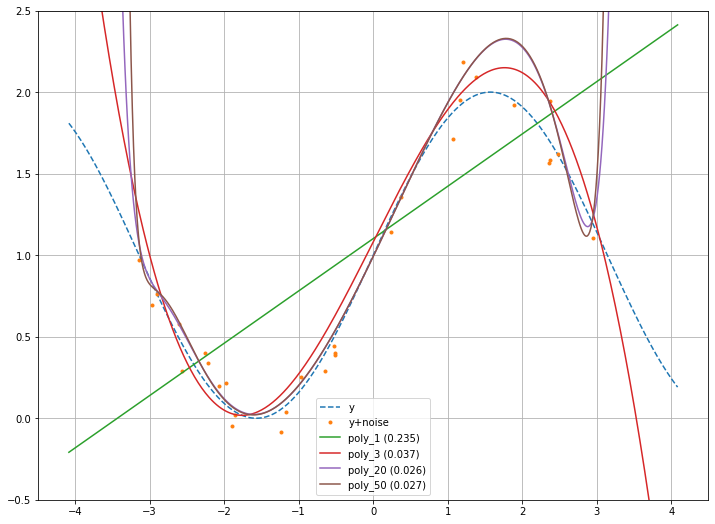

In [6]:
res = plot([1, 3, 20, 50], seed=1)   

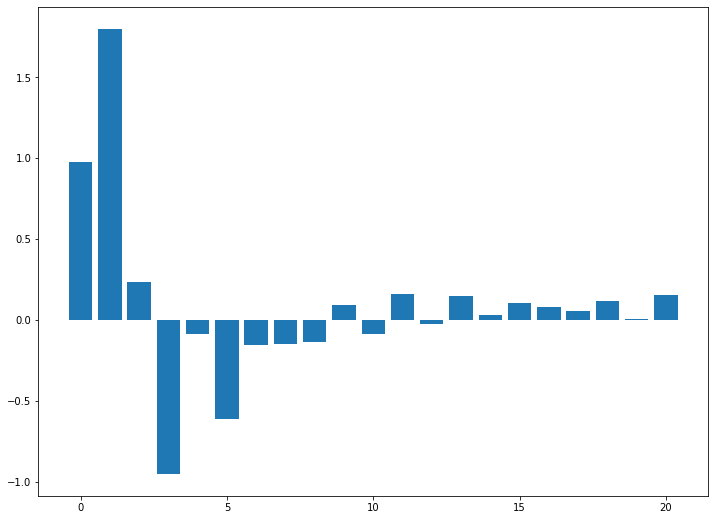

In [7]:
plt.bar([i for i in range(len(res[20]))], res[20])
plt.show()

## Регуляризация (попытка 2)

Для предыдущей задачи, мы понимаем, что полином 3-й степени должен подходить наилучшим образом. И нам бы очень хотелось, чтобы при попытке использовать полиномы более высокой степени, лишние коэффициенты у них равнялись нулю.

Такой регуляризатор есть и он соответствует добавлению регуляризующего члена в виде:

$$
J(\vec{\omega}) = ||\vec{\omega}||_1 = \sum_{i=0}^{K} |\omega_i|
$$

$$
\frac{\partial L}{\partial \vec{\omega}} = 
 -  2 X^T  \vec{y} + 2 (X^T X) \vec{\omega} + \lambda \,\mathrm{sign} (\vec{\omega})
$$

Такая регуляризация называется $l_1$-регуляризацией или Least Absolute Shrinkage and Selection Operator(LASSO).

И, увы, задача не имеет решения в явном виде.

## Метод градиентного спуска

Градиент соответствуют вектору, указывающему направление наибольшего роста функции. Следовательно. если идти в обратном направлении, то можно рано или поздно придти в минимум (в какой-нибудь).

$$
\vec{\omega}^{(k+1)} = \vec{\omega}^{(k)} - \alpha \left. \frac{\partial L}{\partial \vec{\omega}}\right|_{\,\vec{\omega} \, = \, \vec{\omega}^{(k)}}
$$

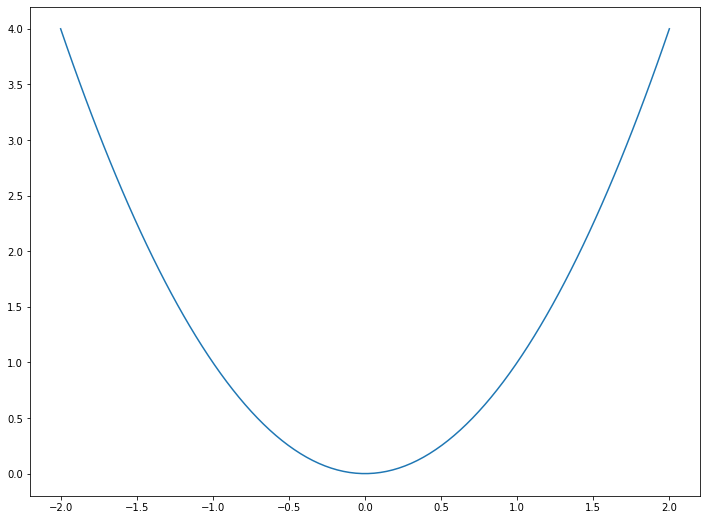

In [33]:
x = np.linspace(-2, 2, 100)
y = x*x
plt.plot(x, y); plt.show()

In [34]:
def solve(x, y, x0, steps, alpha=0.1):
    x_steps = [x0,]
    y_steps = [x0*x0,]
    x = x0
    for _ in range(steps):
        x = x - alpha * 2 * x
        x_steps.append(x)
        y_steps.append(x*x)
        
    return x_steps, y_steps        

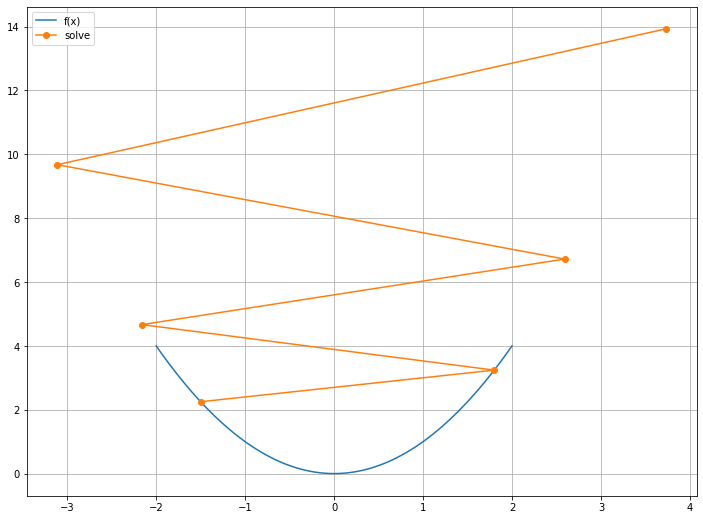

In [38]:
plt.plot(x, y, label="f(x)")
xs, ys = solve(x, y, -1.5, 5, alpha=1.1)
plt.plot(xs, ys, "o-", label="solve")
plt.grid(); plt.legend(); plt.show()

## Стохастический градиентный спуск

В случае, когда у нас очень большая выборка данных, посчитать градиент функционала вида

$$
L = \frac{1}{2N}||\vec{y} - X \vec{\omega}||_2^2
$$

не является уже такой простой задачей.

Вместо обычного шага против градиента, мы используем следующее выражение

$$
    \vec\omega^{(k+1)} = \vec\omega^{(k)} - \alpha \, g(\vec\omega^{(k)}, i)
$$

где 

$$
    E_i[g(\vec\omega, i)] = \frac{\partial L}{\partial \vec\omega}
$$

$$
    L = \frac{1}{2N} \sum_{i = 1}^{N} (y_i - \vec{x}^T_i \vec\omega)^2
$$

$$
    \frac{\partial L}{\partial \vec\omega} = - \frac{1}{N} \sum_{i=1}^{N} (y_i - \vec{x}^T_i \vec\omega) \vec{x}_i
$$

отсюда видно, что 

$$
g(\vec\omega, i) = (y_i - \vec{x}^T_i \vec\omega) \vec{x}_i
$$

##  Снова L1-регуляризация

У нас есть выражение для производной

$$
\frac{\partial L}{\partial \vec{\omega}} = 
 -  2 X^T  \vec{y} + 2 (X^T X) \vec{\omega} + \lambda \,\mathrm{sign} (\vec{\omega})
$$

In [11]:
import numpy.linalg as NL
    
x = np.sort(np.random.uniform(-np.pi, np.pi, 30))
y = np.sin(x) + 1
noise = np.random.normal(0, 0.15, y.shape)

In [12]:
def solve(x, y, power, lamb=0.9, alpha=0.1):
    y = np.atleast_2d(y).T
    x_pow = []
    for i in range(power + 1):
        x_pow.append(x**i)
    X = np.vstack(x_pow).T
    w = np.random.normal(0, 5, size=(X.shape[1], 1))
    mse = ((y - X @ w)**2).sum() / y.shape[0]
    print("MSE = ", mse)
    for _ in range(10):
        dL = 2 * (1-lamb) * (X.T @ X @ w - X.T @ y ) + lamb * np.sign(w)        
        w = w - alpha * dL
        mse = ((y - X @ w)**2).sum() / y.shape[0]
        print("MSE = ", mse)

In [13]:
solve(x, y + noise, 4)

MSE =  8439.046324469406
MSE =  2197252300.7413006
MSE =  576103421141000.2
MSE =  1.51052993894814e+20
MSE =  3.9605751290378235e+25
MSE =  1.038453787219478e+31
MSE =  2.7228022018458616e+36
MSE =  7.139125420522763e+41
MSE =  1.8718624413996115e+47
MSE =  4.907980730314644e+52
MSE =  1.286861380215995e+58


И у нас снова проблемы, почему-то вместо уменьшения среднеквадратичной ошибки, мы получили увеличение.

У нас очень большая разница в масштабах у разных признаков. Необходимо стандартизировать признаки.

$$
    \vec{\omega}
    = 
    \frac{\vec{\omega} - \vec{\mu}}
    {\vec{\sigma}}
$$

In [14]:
def solve(x, y, power, lamb=0.1, alpha=0.0025, verbose=True):
    y = np.atleast_2d(y).T
    
    width = x.max() - x.min()
    x_full = np.linspace(x.min() - 0.1 * width, x.max() + 0.1 * width, 500)
    
    x_pow = []
    xp_full = []
    for i in range(power + 1):
        x_pow.append(x**i)
        xp_full.append(x_full**i)
        
    X = np.vstack(x_pow).T    
    X_full = np.vstack(xp_full).T
    
    mu = X.mean(axis=0); mu[0] = 0
    std = X.std(axis=0); std[0] = 1
    X_s = (X - mu) / std
    Xp_s = (X_full - mu) / std
    
    w = np.ones((X_s.shape[1], 1))
    mse = ((y - X_s @ w)**2).sum() / y.shape[0]

    for _ in range(50000):
        dL = 2 * (1-lamb) * (X_s.T @ X_s @ w - X_s.T @ y ) + lamb * np.sign(w)        
        w = w - alpha * dL
        mse = ((y - X_s @ w)**2).sum() / y.shape[0]
        if verbose:
            print("MSE = ", mse)    
   
    return mse, w.ravel(), x_full, (Xp_s @ w).ravel()

In [15]:
mse, w, lx, lr = solve(x, y + noise, 20, alpha=0.001, verbose=False)
print(mse)

0.008725563880815395


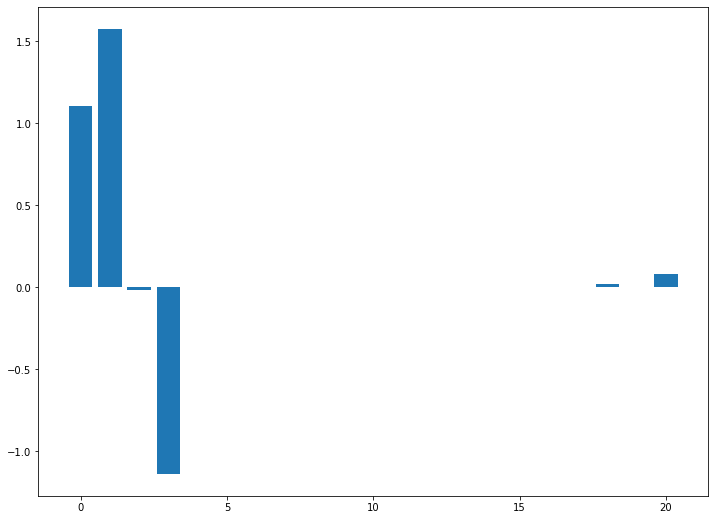

In [16]:
plt.bar([i for i in range(len(w))], w)
plt.show()

In [22]:
x = np.random.uniform(-np.pi, np.pi, 20)
x = np.sort(x)
y = np.sin(x) + 1
noise = np.random.normal(0, 0.2, y.shape)

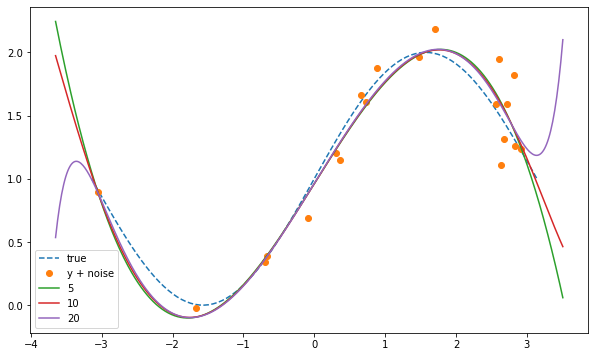

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-np.pi, np.pi, 100), np.sin(np.linspace(-np.pi, np.pi, 100)) + 1, '--', label="true")
plt.plot(x, y + noise, 'o', label="y + noise")
_, _, xr, yr = solve(x, y + noise, 5, verbose=False); plt.plot(xr, yr, '-', label="5")
_, _, xr, yr = solve(x, y + noise, 10, verbose=False); plt.plot(xr, yr, '-', label="10")
_, _, xr, yr = solve(x, y + noise, 15, verbose=False); plt.plot(xr, yr, '-', label="20")
plt.legend(); plt.show()

## Линейный классификатор

При построении линейного классификатора, мы пытаемся разделить пространство признаков с помощью гиперплоскости на два подпространства, соответствующих целевым классам.

Пусть у нас есть задача бинарной классификации, при метки целевого класса обозначим "-1" и "+1".

В этом случае, простейших линейный классификатор можно записать как

$$
f(\vec{x}) = \mathrm{sign}\,(\vec{x}^T \vec{\omega})
$$

## Логистическая регрессия

Частным случаем линейного классификатора является логистическая регрессия. С помощью неё можно оценить вероятность принадлежности прецедента $\vec{x}$ к определенную классу

$$
p_+ = P(y=1|\vec{x}, \vec{\omega}) \\
p_- = P(y=-1|\vec{x}, \vec{\omega}) \\
$$

Будем рассматривать вместо $p_+$ и $p_-$ их отношение:

$$
    R(+) = \frac{p_+}{1 - p_+} \in [0, \infty)
$$

Возьмем логарифм

$$
\log R(+) = \log(p_+) - \log(1-p_+) \in (-\infty, \infty)
$$

Для некоторого набора весов $\vec\omega$, выражение $\vec{x}^T \vec\omega = 0$ определяет гиперплоскость в пространстве параметров.

Пусть $\log R(+) = \vec{x}^T \vec\omega$.

Тогда с помощью небольших преобразований, можем получить

$$
p_+ = \frac{R(+)}{1+R(+)} = \frac{e^{\vec{x}^T \vec\omega}}{1 + e^{\vec{x}^T \vec\omega}} = \frac{1}{1 + e^{-\vec{x}^T \vec\omega}}
$$

Мы получили сигмоиду

$$
\sigma(y) = \frac{1}{1 + e^{-y}}
$$

Хорошо, а как же теперь оценить параметры модели $\vec\omega$?

По принципу максимального правдоподобия.

$$
P(y=1 | \vec{x}, \vec\omega) = \sigma(\vec{x}^T \omega) \\
P(y=-1 | \vec{x}, \vec\omega) = 1 - \sigma(\vec{x}^T \omega) = \sigma(-\vec{x}^T \omega)
$$

Или одним выражением

$$
    P(y = y_i | \vec{x}^T_i, \vec\omega) = \sigma(y_i \vec{x}^T_i \vec\omega)
$$

Если наш классификатор действительно выдает вероятности, то они должны согласовываться с нашей выборкой (считаем, что каждое наблюдение не зависит от других наблюдений)

$$
P(\vec{y}|\vec\omega) = \prod_{i=1}^{N} P(y = y_i | \vec{x}^T_i, \vec\omega) =  \prod_{i=1}^{N} \sigma(y_i \vec{x}^T_i \vec\omega) 
$$

и нам фактически нужно максимизировать данный функционал

Это удообно сделать в виде логарифма

$$
\log P(\vec{y}|\vec{\omega}) = \sum_{i=1}^{N} \log \sigma(y_i \vec{x}^T_i \vec\omega) = -\sum_{i=1}^{N}\log\left(1 + e^{-y_i \vec{x}^T_i \vec\omega}\right)
$$

$$
L_{logloss} = \sum_{i=1}^{N}\log\left(1 + e^{-y_i \vec{x}^T_i \vec\omega}\right) 
\\
L_{logloss} = \sum_{i=1}^{N} \left(
- [y = -1] \log p_- - [y = 1] \log p_+
\right)
$$

## Регуляризация логистической регрессии

Всё практически без изменений

$$
L = L_{logloss} + \frac{1}{C} ||\vec\omega||_2^2
$$

здесь $C$ - это гиперпараметр нашей модели.

В **sklearn** поддерживаются линейные модели. В частности, они представлены 
* LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
* LogisticRegression, LogisticRegressionCV, RidgeClassifier, LassoClassifier
* и другие

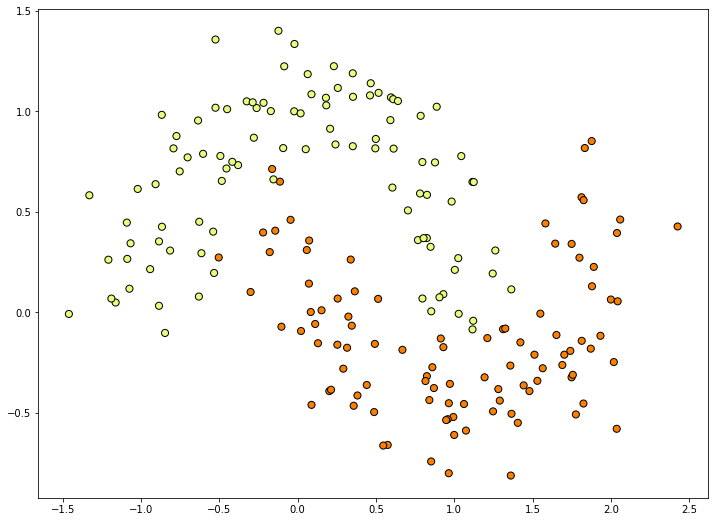

In [39]:
from sklearn.datasets import make_circles, make_moons
#X, Y = make_circles(200, noise=0.2)
X, Y = make_moons(200, noise=0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.get_cmap("Wistia"), 
            edgecolors='k', s=50)
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

def plot(clf, X, Y, power):
    pipeline = make_pipeline(PolynomialFeatures(power), StandardScaler(), clf) 
    pipeline.fit(X, Y)
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    dx = (x_max - x_min) * 0.1
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    dy = (y_max - y_min) * 0.1
    xx, yy = np.meshgrid(np.linspace(x_min - dx, x_max + dx, 100),
                        np.linspace(y_min - dy, y_max + dy, 100))
    Z = pipeline.predict(np.vstack([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Wistia)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.get_cmap("Wistia"), 
            edgecolors='k', s=50)
    
    plt.show()

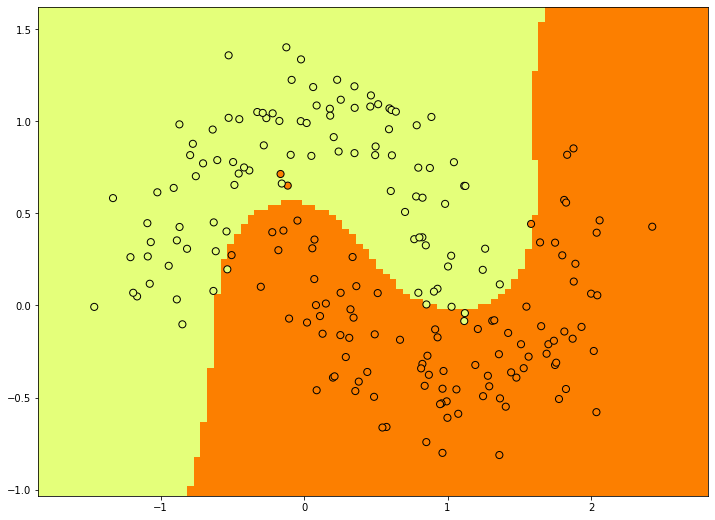

In [45]:
plot(LogisticRegression(C=1 0), X, Y, power=3)

[5.68986603]


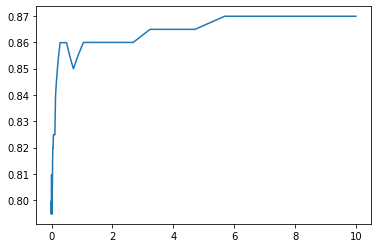

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=13)

C = np.logspace(-3, 1, 50)
logr = LogisticRegressionCV(Cs=C, cv=skf, scoring='accuracy', random_state=0).fit(X, Y)

acc = logr.scores_[True].mean(axis=0)
plt.figure(figsize=(6,4));plt.plot(C, acc);print(logr.C_);plt.show()

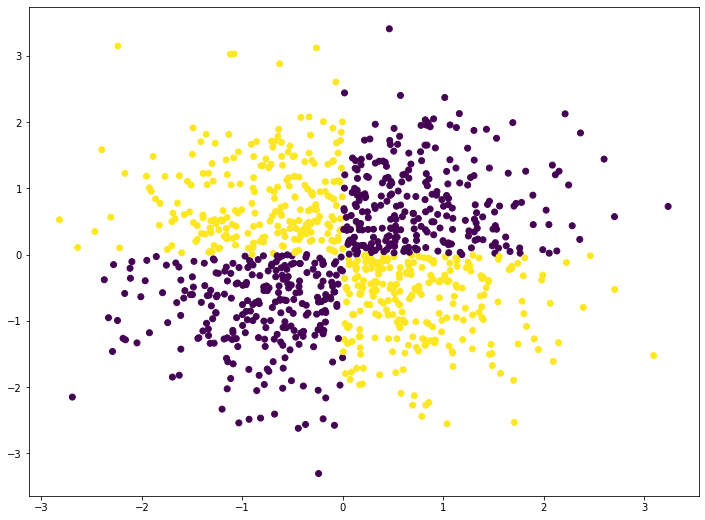

In [47]:
X = np.random.normal(size=(1000, 2))
Y = np.logical_xor(X[:,0] > 0, X[:, 1] > 0)
plt.scatter(X[:,0], X[:,1], c=Y); plt.show()

In [48]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

def plot(C, p):
    pipeline = make_pipeline(PolynomialFeatures(p), 
                             StandardScaler(), 
                             LogisticRegression(C=C))
    pipeline.fit(X, Y)
    xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    Z = pipeline.predict(np.vstack([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap("Wistia"))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.get_cmap("Wistia"), 
            edgecolors='k', s=50)
    plt.show()

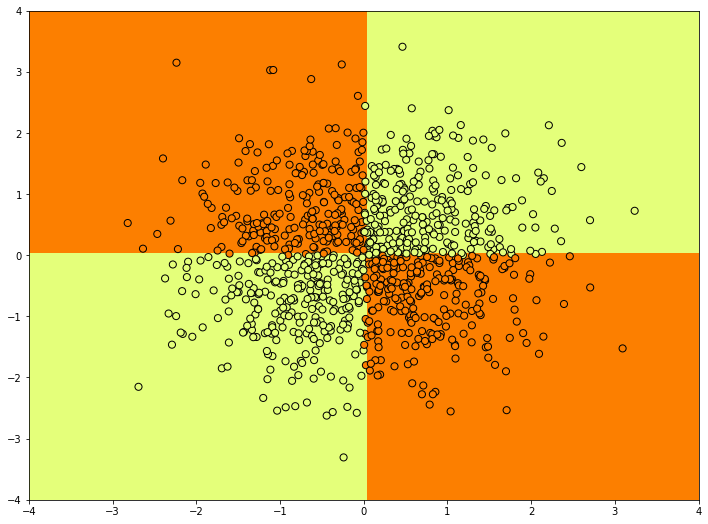

In [50]:
plot(10000, 2)

In [51]:
df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df = df[(df["age"] > 12500)&
          (df["weight"] > 40)&(df["weight"] < 105)&
          (df["height"] > 140)&(df["height"] < 190)&
          (df["ap_lo"] > 60)&(df["ap_lo"] < 110)&
          (df["ap_hi"] > 80)&(df["ap_hi"] < 170)]

In [52]:
train = df[["weight", "height", "ap_lo", "age"]][:50000].values
target = df['ap_hi'][:50000].values

test = df[["weight", "height", "ap_lo", "age"]][50000:].values
target_test = df["ap_hi"][50000:].values

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [54]:
from sklearn.metrics import mean_squared_error

def report(clf):
    clf.fit(train, target)
    print("MSE = ", np.sqrt(mean_squared_error(target_test, 
                                               clf.predict(test))))
    print("Coeff = ", clf.coef_)
    return clf

In [55]:
report(LinearRegression())
report(Ridge(100.0)) 
report(Lasso(2.0));
   
#["weight", "height", "ap_lo", "age"]

MSE =  9.650602023549474
Coeff =  [ 1.26713928 -0.55189988  9.28947655  1.37650734]
MSE =  9.650359162653126
Coeff =  [ 1.26820941 -0.55103398  9.2707073   1.37652696]
MSE =  9.996265907362142
Coeff =  [ 0.         -0.          7.74999465  0.        ]


In [56]:
print(report(RidgeCV(alphas=np.logspace(-2, 1, 100), cv=5)).alpha_)
print(report(LassoCV(alphas=np.logspace(-10, 1, 100), cv=5)).alpha_)

MSE =  9.650583681972881
Coeff =  [ 1.26721546 -0.55183884  9.28814977  1.37650907]
7.054802310718645
MSE =  9.650561732389333
Coeff =  [ 1.26627602 -0.55091494  9.28896297  1.3759501 ]
0.0007742636826811262


## Плюсы

* очень хорошо изученные методы
* довольно быстро работают
* позволяет оценивать вероятность
* можно строить нелинейные плоскости, если добавлять полиномиальные признаки

## Минусы

* плохо работают в задачах, где зависимость ответов от признаков нелинейная
* теорема Гаусса-Маркова на практике практически никогда не выполняется, из-за чего линейные модели работают обычно хуже, чем ожидается